<script src="https://cdn.tailwindcss.com"></script>

<h1 align="center"> <strong>Assignment 2</strong> </h1>

<h3> Vaibhav Sharma <br> 22070126125 <br> AIML-B2 </h3>

<section class="mb-8">
        <h2 class="text-2xl font-bold mb-4">Aim</h2>
        <p class="text-gray-800">
            To implement and compare two types of neural network architectures for image reconstruction and compression:
            standard Autoencoder (AE) and Variational Autoencoder (VAE) on the CIFAR-10 dataset. The study aims to:
        </p>
        <ul class="list-disc ml-8 mt-4">
            <p>1. Reduce high-dimensional image data (32×32×3 = 3072 dimensions) to a lower-dimensional latent space (128 dimensions)</p>
            <p>2. Reconstruct the original images from this compressed representation</p>
            <p>3. Compare the reconstruction quality between AE and VAE approaches</p>
        </ul>
    </section>

<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Theory</h2>
    <div class="bg-gray-100 p-4 my-4 rounded">
        <h3 class="font-bold mb-2">Standard Autoencoder (AE)</h3>
        <p>The autoencoder consists of:</p>
        <ul class="ml-4">
            <p>• Encoder: x → z = f(x) = f(W₁x + b₁)</p>
            <p>• Decoder: z → x̂ = g(z) = g(W₂z + b₂)</p>
            <p>• Loss Function: L = ||x - x̂||² (MSE Loss)</p>
        </ul>
    </div>
    <div class="bg-gray-100 p-4 my-4 rounded">
        <h3 class="font-bold mb-2">Variational Autoencoder (VAE)</h3>
        <p>The VAE extends the standard autoencoder by:</p>
        <ul class="ml-4">
            <p>• Encoder outputs μ and log(σ²) instead of direct latent vector</p>
            <p>• Reparameterization trick: z = μ + σ ⊙ ε, where ε ~ N(0,1)</p>
            <p>• Loss Function: L = MSE(x, x̂) + KL(N(μ,σ²)||N(0,1))</p>
        </ul>
    </div>
</section>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
transform = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

In [3]:
dataset = torchvision.datasets.CIFAR10(
    root="./data", train=True, transform=transform, download=True
)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

Files already downloaded and verified


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device



<h1 class="text-3xl font-bold mb-6">Autoencoder (AE)</h1>
<section class="mb-8">
    <p class="text-gray-800 mb-4">
        Implementation for image compression and reconstruction using a standard autoencoder architecture.
    </p>
    <p class="text-gray-800 mb-6">
        This AE architecture consists of an encoder that compresses input images into a fixed-length latent vector
        and a decoder that reconstructs the original images from these latent representations. Unlike VAE, 
        this implementation uses deterministic encoding without probabilistic sampling.
    </p>
</section>
<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Architecture</h2>
    <div class="bg-gray-100 p-4 rounded-lg">
        <pre class="mb-2">Encoder: Input(3072) → Linear(512) → ReLU → Linear(128)</pre>
        <pre>Decoder: z(128) → Linear(512) → ReLU → Linear(3072) → Tanh</pre>
    </div>
</section>
<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Arguments</h2>
    <div class="bg-gray-100 p-4 rounded-lg">
        <dl>
            <dt class="font-semibold">latent_dim (int, optional)</dt>
            <dd class="ml-4 mb-2">Dimension of the latent space. Defaults to 128.</dd>
        </dl>
    </div>
</section>
<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Attributes</h2>
    <div class="bg-gray-100 p-4 rounded-lg">
        <dl>
            <dt class="font-semibold">encoder (nn.Sequential)</dt>
            <dd class="ml-4 mb-2">Neural network for encoding images into latent representations, consisting of:
                <ul class="list-disc ml-8">
                    <li>Linear layer reducing 3072 dimensions to 512</li>
                    <li>ReLU activation</li>
                    <li>Linear layer reducing 512 dimensions to latent_dim</li>
                </ul>
            </dd>
            <dt class="font-semibold mt-4">decoder (nn.Sequential)</dt>
            <dd class="ml-4">Neural network for reconstructing images from latent representations, consisting of:
                <ul class="list-disc ml-8">
                    <li>Linear layer expanding latent_dim to 512 dimensions</li>
                    <li>ReLU activation</li>
                    <li>Linear layer expanding 512 dimensions to 3072</li>
                    <li>Tanh activation for normalizing output values to [-1, 1]</li>
                </ul>
            </dd>
        </dl>
    </div>
</section>
<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Input</h2>
    <div class="bg-gray-100 p-4 rounded-lg">
        <dl>
            <dt class="font-semibold">x (torch.Tensor)</dt>
            <dd class="ml-4">Input tensor of shape (batch_size, 3, 32, 32) representing RGB images</dd>
        </dl>
    </div>
</section>
<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Output</h2>
    <div class="bg-gray-100 p-4 rounded-lg">
        <dl>
            <dt class="font-semibold">decoded (torch.Tensor)</dt>
            <dd class="ml-4">Reconstructed images of shape (batch_size, 3, 32, 32) with values normalized to [-1, 1] range</dd>
        </dl>
    </div>
</section>
<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Key Differences from VAE</h2>
    <div class="bg-gray-100 p-4 rounded-lg">
        <ul class="list-disc ml-4">
            <li class="mb-2">Direct encoding to latent space without probability distribution</li>
            <li class="mb-2">No sampling process in the latent space</li>
            <li class="mb-2">Simpler architecture with fewer parameters</li>
            <li>Typically provides sharper reconstructions but less structured latent space</li>
        </ul>
    </div>
</section>


In [ ]:
# Define Autoencoder (AE)
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=128):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(32 * 32 * 3, 512), nn.ReLU(), nn.Linear(512, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 32 * 32 * 3),
            nn.Tanh(),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.view(x.size(0), 3, 32, 32)


<h1 class="text-3xl font-bold mb-6">Variational Autoencoder (VAE)</h1>
<section class="mb-8">
    <p class="text-gray-800 mb-4">
        Implementation for image compression and reconstruction.
    </p>
    <p class="text-gray-800 mb-6">
        This VAE architecture consists of an encoder that maps input images to a latent distribution
        (characterized by mean and log-variance) and a decoder that reconstructs images from sampled
        latent vectors. The model uses the reparameterization trick for backpropagation through
        the sampling process.
    </p>
</section>
<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Architecture</h2>
    <div class="bg-gray-100 p-4 rounded-lg">
        <pre class="mb-2">Encoder: Input(3072) → Linear(512) → ReLU</pre>
        <pre class="mb-2">Latent: Linear(mu), Linear(logvar) → sampling → z(128)</pre>
        <pre>Decoder: z(128) → Linear(512) → ReLU → Linear(3072) → Tanh</pre>
    </div>
</section>
<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Arguments</h2>
    <div class="bg-gray-100 p-4 rounded-lg">
        <dl>
            <dt class="font-semibold">latent_dim (int, optional)</dt>
            <dd class="ml-4 mb-2">Dimension of the latent space. Defaults to 128.</dd>
        </dl>
    </div>
</section>
<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Attributes</h2>
    <div class="bg-gray-100 p-4 rounded-lg">
        <dl>
            <dt class="font-semibold">encoder (nn.Sequential)</dt>
            <dd class="ml-4 mb-2">Neural network for encoding images</dd>
            <dt class="font-semibold">fc_mu (nn.Linear)</dt>
            <dd class="ml-4 mb-2">Layer for computing mean of latent distribution</dd>
            <dt class="font-semibold">fc_logvar (nn.Linear)</dt>
            <dd class="ml-4 mb-2">Layer for computing log variance of latent distribution</dd>
            <dt class="font-semibold">decoder (nn.Sequential)</dt>
            <dd class="ml-4">Neural network for decoding latent vectors to images</dd>
        </dl>
    </div>
</section>
<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Input</h2>
    <div class="bg-gray-100 p-4 rounded-lg">
        <dl>
            <dt class="font-semibold">x (torch.Tensor)</dt>
            <dd class="ml-4">Input tensor of shape (batch_size, 3, 32, 32)</dd>
        </dl>
    </div>
</section>
<section class="mb-8">
    <h2 class="text-2xl font-bold mb-4">Output</h2>
    <div class="bg-gray-100 p-4 rounded-lg">
        <p class="font-semibold mb-2">tuple: Contains:</p>
        <ul class="list-disc ml-8">
            <li class="mb-2">
                <span class="font-semibold">decoded (torch.Tensor):</span>
                Reconstructed images of shape (batch_size, 3, 32, 32)
            </li>
            <li class="mb-2">
                <span class="font-semibold">mu (torch.Tensor):</span>
                Mean vectors of shape (batch_size, latent_dim)
            </li>
            <li>
                <span class="font-semibold">logvar (torch.Tensor):</span>
                Log variance vectors of shape (batch_size, latent_dim)
            </li>
        </ul>
    </div>
</section>


In [ ]:
# Define Variational Autoencoder (VAE)
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dim=128):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(32 * 32 * 3, 512), nn.ReLU())
        self.fc_mu = nn.Linear(512, latent_dim)
        self.fc_logvar = nn.Linear(512, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 32 * 32 * 3),
            nn.Tanh(),
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.encoder(x)
        mu, logvar = self.fc_mu(x), self.fc_logvar(x)
        z = self.reparameterize(mu, logvar)
        decoded = self.decoder(z)
        return decoded.view(x.size(0), 3, 32, 32), mu, logvar

In [7]:
def save_best_model(model, loss, best_loss, model_path):
    if loss < best_loss:
        best_loss = loss
        torch.save(model.state_dict(), model_path)
        print(f"Model saved with loss: {loss:.4f}")
    return best_loss

In [8]:
# Training function for Autoencoder
def train_autoencoder(
    model, dataloader, epochs=10, lr=1e-3, model_path="best_autoencoder.pth"
):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    model.to(device)
    best_loss = float("inf")

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        epoch_loss = 0
        for images, _ in tqdm(dataloader, desc=f"Training Epoch {epoch+1}"):
            images = images.to(device)
            outputs = model(images)
            loss = criterion(outputs, images)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(dataloader)
        print(f"Epoch {epoch+1} Loss: {avg_loss:.4f}")
        best_loss = save_best_model(model, avg_loss, best_loss, model_path)
    return model

In [9]:
# Training function for Variational Autoencoder (VAE)
def train_vae(model, dataloader, epochs=10, lr=1e-3, model_path="best_vae.pth"):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.to(device)
    best_loss = float("inf")

    def loss_function(recon_x, x, mu, logvar):
        recon_loss = nn.MSELoss()(recon_x, x)
        kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return recon_loss + kld_loss

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        epoch_loss = 0
        for images, _ in tqdm(dataloader, desc=f"Training Epoch {epoch+1}"):
            images = images.to(device)
            outputs, mu, logvar = model(images)
            loss = loss_function(outputs, images, mu, logvar)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(dataloader)
        print(f"Epoch {epoch+1} Loss: {avg_loss:.4f}")
        best_loss = save_best_model(model, avg_loss, best_loss, model_path)
    return model

In [10]:
# Load saved model function
def load_model(model, model_path):
    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path))
        model.to(device)
        print(f"Model loaded from {model_path}")
    else:
        print(f"No saved model found at {model_path}")
    return model

In [11]:
# Visualizing Reconstruction
def visualize_reconstruction(model, dataloader, is_vae=False):
    model.eval()
    images, _ = next(iter(dataloader))
    images = images.to(device)
    with torch.no_grad():
        if is_vae:
            reconstructed, _, _ = model(images)
        else:
            reconstructed = model(images)

    fig, axes = plt.subplots(2, 8, figsize=(10, 4))
    for i in range(8):
        axes[0, i].imshow(images[i].cpu().permute(1, 2, 0) * 0.5 + 0.5)
        axes[0, i].axis("off")
        axes[1, i].imshow(reconstructed[i].cpu().permute(1, 2, 0) * 0.5 + 0.5)
        axes[1, i].axis("off")
    plt.show()

In [12]:
# Initialize and train Autoencoder
ae = Autoencoder().to(device)
ae = train_autoencoder(ae, dataloader, epochs=10, lr=1e-3)

Epoch 1/10


Training Epoch 1: 100%|██████████| 782/782 [00:09<00:00, 84.55it/s]


Epoch 1 Loss: 0.0509
Model saved with loss: 0.0509
Epoch 2/10


Training Epoch 2: 100%|██████████| 782/782 [00:08<00:00, 88.02it/s]


Epoch 2 Loss: 0.0317
Model saved with loss: 0.0317
Epoch 3/10


Training Epoch 3: 100%|██████████| 782/782 [00:09<00:00, 85.98it/s]


Epoch 3 Loss: 0.0274
Model saved with loss: 0.0274
Epoch 4/10


Training Epoch 4: 100%|██████████| 782/782 [00:09<00:00, 85.59it/s]


Epoch 4 Loss: 0.0256
Model saved with loss: 0.0256
Epoch 5/10


Training Epoch 5: 100%|██████████| 782/782 [00:09<00:00, 85.78it/s]


Epoch 5 Loss: 0.0250
Model saved with loss: 0.0250
Epoch 6/10


Training Epoch 6: 100%|██████████| 782/782 [00:09<00:00, 85.74it/s]


Epoch 6 Loss: 0.0245
Model saved with loss: 0.0245
Epoch 7/10


Training Epoch 7: 100%|██████████| 782/782 [00:09<00:00, 86.22it/s]


Epoch 7 Loss: 0.0245
Model saved with loss: 0.0245
Epoch 8/10


Training Epoch 8: 100%|██████████| 782/782 [00:09<00:00, 86.72it/s]


Epoch 8 Loss: 0.0243
Model saved with loss: 0.0243
Epoch 9/10


Training Epoch 9: 100%|██████████| 782/782 [00:09<00:00, 85.89it/s]


Epoch 9 Loss: 0.0242
Model saved with loss: 0.0242
Epoch 10/10


Training Epoch 10: 100%|██████████| 782/782 [00:09<00:00, 84.00it/s]

Epoch 10 Loss: 0.0241
Model saved with loss: 0.0241


In [13]:
# Initialize and train Variational Autoencoder
vae = VariationalAutoencoder().to(device)
vae = train_vae(vae, dataloader, epochs=10, lr=1e-3)

Epoch 1/10


Training Epoch 1: 100%|██████████| 782/782 [00:09<00:00, 80.63it/s]


Epoch 1 Loss: 6.5781
Model saved with loss: 6.5781
Epoch 2/10


Training Epoch 2: 100%|██████████| 782/782 [00:09<00:00, 81.40it/s]


Epoch 2 Loss: 0.3132
Model saved with loss: 0.3132
Epoch 3/10


Training Epoch 3: 100%|██████████| 782/782 [00:09<00:00, 80.70it/s]


Epoch 3 Loss: 0.2660
Model saved with loss: 0.2660
Epoch 4/10


Training Epoch 4: 100%|██████████| 782/782 [00:09<00:00, 80.91it/s]


Epoch 4 Loss: 49.2414
Epoch 5/10


Training Epoch 5: 100%|██████████| 782/782 [00:09<00:00, 82.30it/s]


Epoch 5 Loss: 1.1152
Epoch 6/10


Training Epoch 6: 100%|██████████| 782/782 [00:09<00:00, 82.36it/s]


Epoch 6 Loss: 0.8371
Epoch 7/10


Training Epoch 7: 100%|██████████| 782/782 [00:09<00:00, 82.82it/s]


Epoch 7 Loss: 0.6155
Epoch 8/10


Training Epoch 8: 100%|██████████| 782/782 [00:09<00:00, 82.81it/s]


Epoch 8 Loss: 0.4480
Epoch 9/10


Training Epoch 9: 100%|██████████| 782/782 [00:09<00:00, 81.30it/s]


Epoch 9 Loss: 0.3213
Epoch 10/10


Training Epoch 10: 100%|██████████| 782/782 [00:09<00:00, 81.43it/s]

Epoch 10 Loss: 0.2813


In [14]:
# Load trained models
ae = load_model(Autoencoder(), "best_autoencoder.pth")
vae = load_model(VariationalAutoencoder(), "best_vae.pth")

Model loaded from best_autoencoder.pth
Model loaded from best_vae.pth


C:\Users\vaibh\AppData\Local\Temp\ipykernel_26920\3746778026.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Autoencoder Reconstruction


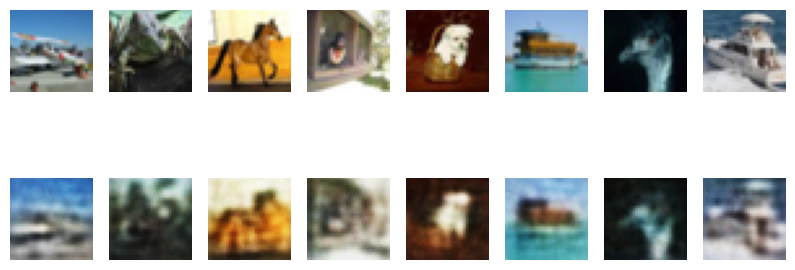

Variational Autoencoder Reconstruction


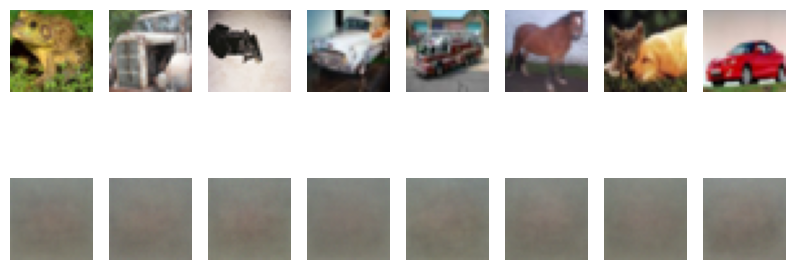

In [15]:
print("Autoencoder Reconstruction")
visualize_reconstruction(ae, dataloader)
print("Variational Autoencoder Reconstruction")
visualize_reconstruction(vae, dataloader, is_vae=True)

<section class="mb-8">
        <h2 class="text-2xl font-bold mb-4">Conclusion</h2>
        <p class="text-gray-800">
            Based on the visual reconstruction results:
        </p>
        <div class="bg-gray-100 p-4 my-4 rounded">
            <h3 class="font-bold mb-2">Standard Autoencoder (AE)</h3>
            <ul class="ml-4">
                <p>• Produces sharper reconstructions with more detailed features</p>
                <p>• Maintains color fidelity relatively well</p>
                <p>• Shows some blurriness but preserves the overall structure of objects</p>
                <p>• Performs better at reconstructing high-frequency details</p>
            </ul>
        </div>
        <div class="bg-gray-100 p-4 my-4 rounded">
            <h3 class="font-bold mb-2">Variational Autoencoder (VAE)</h3>
            <ul class="ml-4">
                <p>• Generates significantly blurrier reconstructions</p>
                <p>• Shows substantial loss of fine details</p>
                <p>• Produces more washed-out colors</p>
            </ul>
        </div>
        <div class="bg-gray-100 p-4 my-4 rounded">
            <h3 class="font-bold mb-2">Key Observations</h3>
            <p>1. The trade-off between reconstruction quality and latent space structure is evident:
                - AE provides better reconstruction quality but potentially less structured latent space
                - VAE sacrifices reconstruction sharpness for a more organized latent representation</p>
            <p>2. While VAE's probabilistic approach offers theoretical advantages for generative tasks, it comes at the cost of reconstruction fidelity</p>
            <p>3. For pure reconstruction tasks, the standard autoencoder appears to be more suitable</p>
            <p>4. The current architecture might benefit from:
                - Deeper convolutional layers for better feature extraction
                - Adjusting the KL divergence weight in the VAE loss function
                - Implementing more sophisticated architectures like β-VAE or VQ-VAE</p>
        </div>
    </section>